# James Conway's Game of Life

## Rules
...



In [26]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

### Some classical patterns

In [29]:
patterns = dict({
    'glider': np.array([[0, 1, 0],
                        [0, 0, 1],
                        [1, 1, 1]], dtype=np.int),
    'small_exploder': np.array([[0,1,0],
                                [1,1,1],
                                [1,0,1],
                                [0,1,0]], dtype=np.int),
    'exploder': np.array([[1,0,1,0,1],
                          [1,0,0,0,1],
                          [1,0,0,0,1],
                          [1,0,0,0,1],
                          [1,0,1,0,1]], dtype=np.int),
    'line': np.ones((1,10), dtype=np.int),
    'spaceship': np.array([[0,1,1,1,1],
                           [1,0,0,0,1],
                           [0,0,0,0,1],
                           [1,0,0,1,0]], dtype=np.int),
    'tumbler': np.array([[0,1,1,0,1,1,0],
                         [0,1,1,0,1,1,0],
                         [0,0,1,0,1,0,0],
                         [1,0,1,0,1,0,1],
                         [1,0,1,0,1,0,1],
                         [1,1,0,0,0,1,1]]),
    'gun': np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0],
                     [1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]], dtype=np.int)
    })

el = patterns['tumbler']

### Create initial grid

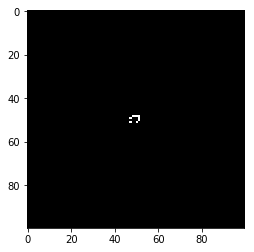

In [30]:
X = np.zeros((100,100))
X = X.astype(np.bool)

# Add pattern in the middle of X.
def add_to_grid(X, element):
    """
    Add element to grid X (centered)
    """
    h,w = X.shape
    he, we = element.shape
    X[(h-he)/2:(h+he)/2, (w-we)/2:(w+we)/2] = element

add_to_grid(X, el)
plt.imshow(X, vmin=0, vmax=1, cmap='gray')
plt.show()


### Functions to define evolution

In [31]:

# Compute next step of X

kernel = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]], dtype=np.int8)
def evolve(X):
    """
    Updates X with next step of the game of life
    """
    nbors = convolve2d(X, kernel, mode='same', boundary='fill')
    X[:,:] = ((nbors == 3) | (X & (nbors == 4)))
    

### Animation

In [32]:
fig = plt.figure()
im = plt.imshow(np.zeros(X.shape, dtype=np.bool),
                cmap='gray', vmin=0, vmax=1, animated=True)

def updatefig(i):
    evolve(X)
    im.set_array(X)
    return im,

anim = animation.FuncAnimation(fig, updatefig, frames=np.linspace(1,100,100), interval=200, blit=True)
HTML(anim.to_html5_video())
